# Importing Libraries, Function Definitions & Loading Dataset

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
np.random.seed(57) # set global seed
plt.style.use('seaborn')  # set plotting style
warnings.filterwarnings('ignore') # supress warnings

In [3]:
# draw ECDF
def draw_ecdf(data, data_label):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y, marker='.', linestyle='none')
    plt.xlabel(data_label)
    plt.ylabel('ECDF')
    plt.show()

In [4]:
titanic = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# EDA

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic[["Age", "SibSp", "Parch", "Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## Understanding the Features

### PassengerId

In [8]:
print(f'Data Type is {titanic.PassengerId.dtype}')
print(
    f'Distribution Starts at {titanic.PassengerId.min()} and Ends at {titanic.PassengerId.max()}'
)
print(f'Number of missing value is {titanic.PassengerId.isna().sum()}')
print(f'Number of duplicate value is {titanic.PassengerId.duplicated().sum()}')

Data Type is int64
Distribution Starts at 1 and Ends at 891
Number of missing value is 0
Number of duplicate value is 0


We see that PassengerId is unique and there are no missing values. It has no special significance other than being a unique identifying Number.

### Pclass

In [9]:
print(f'Data Type is {titanic.Pclass.dtype}')
print(f'Number of Unique Values are {titanic.Pclass.nunique()}')
print(f'Value Distribution: \n{titanic.Pclass.value_counts(sort=False)}')

Data Type is int64
Number of Unique Values are 3
Value Distribution: 
1    216
2    184
3    491
Name: Pclass, dtype: int64


Ticket Class is mainly categorical but it is encoded as integer. Also maximum percentage of passengers traveled with 3rd class ticket.

### Name

In [10]:
print(f'Data Type is {titanic.Name.dtype}')
print(f'Number of duplicate value is {titanic.Name.duplicated().sum()}')

Data Type is object
Number of duplicate value is 0


In [11]:
np.sort(titanic.Name)

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

Name is Unique but we see a lot of people with same family name, which can be used as a new feature

### Sex

In [12]:
print(f'Data Type is {titanic.Sex.dtype}')
print(f'Number of Unique Values are {titanic.Sex.nunique()}')
print(f'Value Distribution: \n{titanic.Sex.value_counts(sort=False)}')

Data Type is object
Number of Unique Values are 2
Value Distribution: 
female    314
male      577
Name: Sex, dtype: int64


Gender is a categorical variable but encoded as string. We also see males are almost double of that of females.

### Age

In [13]:
print(f'Data Type is {titanic.Age.dtype}')
print(f'Number of missing value is: {titanic.Age.isna().sum()}')

Data Type is float64
Number of missing value is: 177


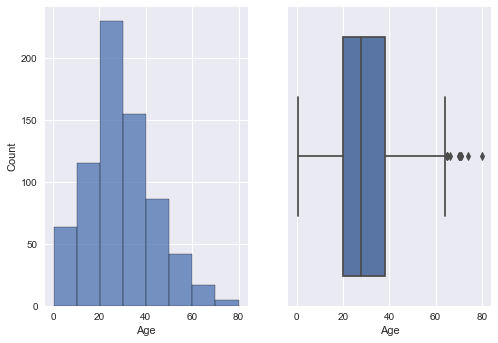

In [14]:
# let's visualize it's distribution
fig, axis = plt.subplots(ncols=2)
sns.histplot(titanic.Age, bins=8, ax=axis[0])
sns.boxplot(x=titanic.Age, ax=axis[1])
plt.show()

Age distribution is concentrated at around 20-40 years Age. There are very few passengers above 60. There are some missing values which needs to be imputed.

### SibSp(Number of Siblings/Spouses) & Parch(Number of Parents/Children)

We can create a column Family Size by adding these two columns.

In [15]:
titanic['Family_Size'] = titanic.SibSp + titanic.Parch

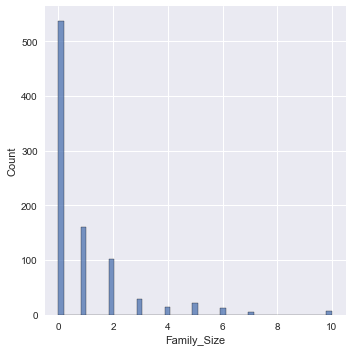

In [16]:
sns.displot(titanic.Family_Size)

Maximum percentage of people are traveling alone.

### Ticket

In [17]:
titanic.Ticket.value_counts()[:5]

347082      7
1601        7
CA. 2343    7
347088      6
CA 2144     6
Name: Ticket, dtype: int64

We see some tickets are present multiple times in the dataset. This may mean multiple passengers traveling together were issued only one ticket. we will further inspect this later.

### Fare

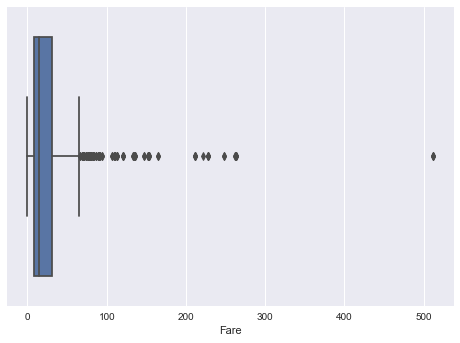

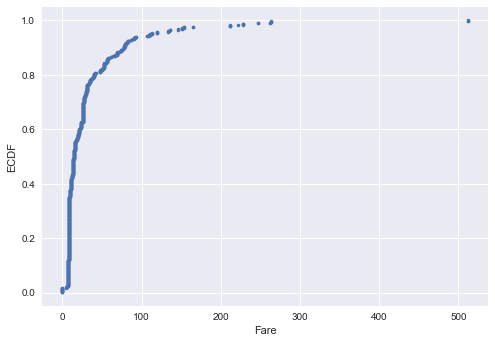

In [18]:
sns.boxplot(x=titanic.Fare)
plt.show()
draw_ecdf(titanic.Fare, 'Fare')

We see there are some very big Fares. It may be due to registering total fare of group travelers(Passengers with same ticket) to every group member. To Check our hypothesis let's dig deeper.

In [19]:
titanic.query("Ticket == '113503'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C82,C,2


In [20]:
# we took 50 as threshold as from ECDF we see that more than 80% Fare is less than 50$.
titanic[titanic.Fare > 50].sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S,0
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S,0
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S,0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S,2
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.500,NaN,S,0
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,NaN,S,2
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.000,B22,S,2


From visual inspection of Data we see that our hypothesis is highly likely to be true.

In [21]:
# A lucky break
titanic.query('Fare > 200').Ticket.value_counts().tail()

PC 17755    3
PC 17558    2
PC 17608    2
113503      1
PC 17483    1
Name: Ticket, dtype: int64

There are two passengers who has >200$ Fare but has no one with same ticket. What's Going on!!

In [22]:
titanic.query("Ticket == '113503' | Ticket == 'PC 17483'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,2
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0


We see though 'Widener, Mr. Harry Elkins' has no one with same ticket but looks like he has 2 Family members on board. But 'Farthing, Mr. John' has no family members on board. So, let's check it out.

In [23]:
titanic[titanic.Name.str.contains('Widener')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C82,C,2


In [24]:
titanic.dropna(axis=0, subset=[
    'Cabin'
])[titanic.Cabin.dropna().str.contains('C')].sort_values('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.00,0,0,113786,30.5000,C104,S,0
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,0
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.00,0,0,110465,52.0000,C110,S,0
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C,0
273,274,0,1,"Natsch, Mr. Charles H",male,37.00,0,1,PC 17596,29.7000,C118,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.00,1,0,113803,53.1000,C123,S,1
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S,0


It seems there is no other passenger with last name 'Widener'. Besides from visually inspecting the data and comparing with fares of passengers with same cabin level 'C' and Same boarding port we, see this Fares are very unlikely under normal circumstances. The reason remains Unknown. (sigh).

### Cabin

In [25]:
titanic.Cabin.value_counts()[:5]

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
E101           3
Name: Cabin, dtype: int64

We see that some cabin are issued for several passengers which is normal for passengers who has family members or companions.
We also see that several cabins were also booked together in some cases.

In [26]:
titanic.Cabin.isna().sum()

687

We see there are many missing values for Cabin which is pretty unlikely to happen randomly. Let's dig deeper.

We have a pretty good guess about where to start. Our guess is not all ticket class holders could book a Cabin if they wanted.

In [27]:
titanic.groupby('Pclass').Cabin.count()

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

We saw that our guess wasn't correct. We will deal with these missing values later.

### Embarked

In [28]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
titanic.Embarked.isna().sum()

2

We see there are 3 boarding ports. Also only 2 missing value.

## Checking For Duplicate Values

In [30]:
titanic.duplicated().sum()

0

We see that no row is duplicate of other rows.

But, from previous analysis we saw 'Ticket' & 'Cabin' column has duplicate values. They may be very insightful. For example, passengers with same ticket number are likely to travel together, passengers with same cabin number are also likely to travel together and many other possibilities.

### Duplicated Ticket

In [31]:
titanic_ticket_duplicated = titanic[titanic.duplicated(
    "Ticket", keep=False)].sort_values("Ticket")

In [32]:
print(
    f"Total number of Duplicated Tickets is: {titanic_ticket_duplicated.shape[0]}"
)
print(
    f"Total number of Unique Duplicated Tickets is: {titanic_ticket_duplicated.Ticket.nunique()}"
)

Total number of Duplicated Tickets is: 344
Total number of Unique Duplicated Tickets is: 134


In [33]:
# Examine first few rows
titanic_ticket_duplicated.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,0
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,0
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,0
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S,2
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,2
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,2
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,0
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,1
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,1


In [34]:
# Now let's check for most frequent duplicated tickets
titanic_ticket_duplicated.Ticket.value_counts()[:10]

CA. 2343        7
1601            7
347082          7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
4133            4
17421           4
Name: Ticket, dtype: int64

In [35]:
titanic_ticket_duplicated[titanic_ticket_duplicated.Ticket == "347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,6
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,6
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,6
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,6
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,6
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,6
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,6


### Duplicated Cabin

In [36]:
titanic_cabin_duplicated = titanic[titanic.duplicated(
    "Cabin", keep=False)].sort_values("Cabin").dropna(subset=['Cabin'])

In [37]:
print(
    f"Total number of Duplicated Cabin is: {titanic_cabin_duplicated.shape[0]}"
)
print(
    f"Total number of Unique Duplicated Tickets is: {titanic_cabin_duplicated.Cabin.nunique()}"
)

Total number of Duplicated Cabin is: 103
Total number of Unique Duplicated Tickets is: 46


In [38]:
titanic_cabin_duplicated.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,1
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,1
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,1
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2


In [39]:
# Now let's check for most frequent duplicated cabins
titanic_cabin_duplicated.Cabin.value_counts()[:10]

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
E101           3
F2             3
C22 C26        3
B18            2
E24            2
Name: Cabin, dtype: int64

In [40]:
titanic_cabin_duplicated[titanic_cabin_duplicated.Cabin == "B96 B98"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,3
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,3
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,3
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,3


<b>Interpretation:</b>

    1. Same Ticket Number holders are Traveling together.
    2. In most cases They are likely to be family members, but they may also be friends, relatives, maids or companions etc.
    3. Passengers Traveling together are likely to book same and/or adjacent cabins

## Dealing with Null Values

In [41]:
# Checking for null values in titanic dataset
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
dtype: int64

There are significant number of rows with missing values. But as there are only 891 observation available for training our model, we can't drop these rows.

Another approach could be dropping these columns but they may contain useful information.

So, we will try to impute these values.

### Column: Embarked

In [42]:
print(f"Embarked Column has {titanic.Embarked.nunique()} unique values.")
print(f"\nFrequency of these values are: \n{titanic.Embarked.value_counts()}")
print(
    f"\nPercentage Frequency of values are: \n{titanic.Embarked.value_counts(normalize=True)*100}"
)

Embarked Column has 3 unique values.

Frequency of these values are: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64

Percentage Frequency of values are: 
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


As maximum passengers(72%) boarded from Southampton('S'), we can impute missing values with 'S', without introducing significant noise to the data as there is only 2 missing values

In [43]:
titanic.Embarked.fillna("S", inplace=True)

### Column: Cabin

In [44]:
print(f"Cabin Column has {titanic.Cabin.nunique()} unique values.")
print(
    f"\nPercentage Frequency of values are: \n{titanic.Cabin.value_counts(normalize=True)*100}"
)

Cabin Column has 147 unique values.

Percentage Frequency of values are: 
B96 B98        1.960784
G6             1.960784
C23 C25 C27    1.960784
F2             1.470588
E101           1.470588
                 ...   
C111           0.490196
C110           0.490196
C50            0.490196
B71            0.490196
C85            0.490196
Name: Cabin, Length: 147, dtype: float64


As 'Cabin' Column has too many unique values and very little repetitive values it will be impossible to impute these values with any certain values.

So, we will impute these with a universal constant value. This will enable us to explore for any probable feature engineering later. For this value, we can assume that these passengers did not book a cabin and so these values are represented as missing values.

In [45]:
titanic.Cabin.fillna("non_cabin", inplace=True)

### Column: Age

In [46]:
print(f"Age Column has {titanic.Age.nunique()} unique values.")
print(f"\nFrequency of these values are: \n{titanic.Age.value_counts()}")

Age Column has 88 unique values.

Frequency of these values are: 
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


We see that 'Age' has many unique values but as it's a numeric column we can impute the missing values in several ways. So, let's check it's distribution first.

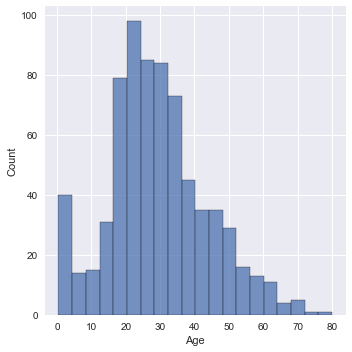

In [47]:
sns.displot(titanic.Age)

<AxesSubplot:xlabel='Age'>

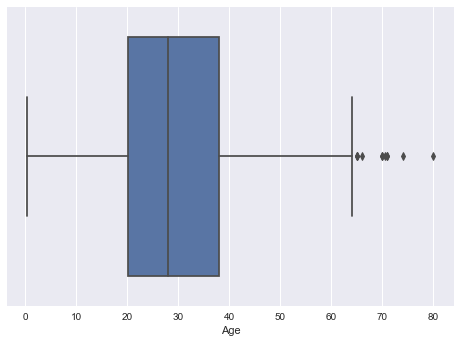

In [48]:
sns.boxplot(x=titanic.Age)

We see that distribution of Age is right skewed. So, for imputation we will use median as it is more robust in case of outliers. 

In [49]:
titanic.Age.fillna(titanic.Age.median(), inplace=True)

## Dealing With Null Values (Test Data)

In [50]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have to make predictions for each row of test data. Therefore we can't drop any row.

### Column: Age

We will impute Null Values with median as we did with train(titanic) data

In [51]:
test_data.Age.fillna(test_data.Age.median(), inplace=True)

### Column: Cabin

We will impute Null Values as we did with titanic data

In [52]:
test_data.Cabin.fillna('non_cabin', inplace=True)

### Column: Fare

Fare has only 1 missing value. But before imputation let's check for any other relationships that will help us impute this value

In [53]:
test_data[test_data.Fare == np.NaN]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


It seems it's not encoded as normal NaN. So we will first fill this value with -1 and then explore.

In [54]:
# creating a copy, so that any operation doesn't affect our main data.
td_cpy = test_data.copy()
td_cpy.Fare.fillna(-1, inplace=True)
td_cpy[td_cpy.Fare == -1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,-1.0,non_cabin,S


We will impute this with fare for passenger who is:

    1. Traveling alone (no SibSp or Parch)
    2. Traveling in 3rd class.
    3. No cabin
    4. Boarded from Southampton

In [55]:
profile = td_cpy[(td_cpy.Pclass == 3) & (td_cpy.SibSp + td_cpy.Parch == 0) &
          (td_cpy.Cabin == 'non_cabin') & (td_cpy.Embarked == 'S')]

print(f'Number of people who fit our profile is: {profile.shape[0]}')
profile.head()

Number of people who fit our profile is: 91


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,non_cabin,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,non_cabin,S
10,902,3,"Ilieff, Mr. Ylio",male,27.0,0,0,349220,7.8958,non_cabin,S
36,928,3,"Roth, Miss. Sarah A",female,27.0,0,0,342712,8.0500,non_cabin,S
37,929,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,non_cabin,S


We see Fare seems to vary. So we will impute with mode of Fare of the passengers who fit our profile

In [56]:
print(f'Here we will impute with {float(profile.Fare.mode())}')
test_data.Fare.fillna(float(profile.Fare.mode()), inplace=True)

Here we will impute with 8.05


In [57]:
# sanity check
test_data.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                         8.05
Cabin                   non_cabin
Embarked                        S
Name: 152, dtype: object

## Bivariate Analysis with Target Variable (Survived)

### Relation between Survival & Ticket Class (Pclass) 

In [58]:
# let's check for unique ticket classes
titanic.Pclass.value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

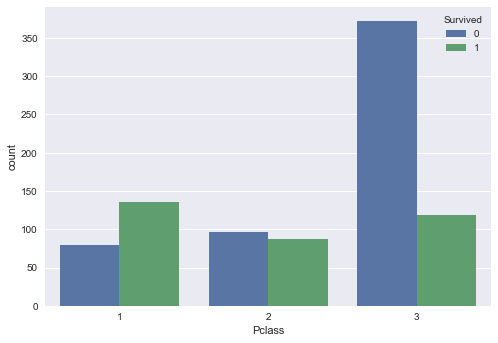

In [59]:
sns.countplot(x=titanic.Pclass, hue=titanic.Survived)

There's visually an imbalance. but that might be due to large number of passengers with 3rd class ticket. let's dig deeper.

In [60]:
print(
    f"Percent representation of Ticket class: \n{titanic.Pclass.value_counts(normalize=True, sort=False)*100}"
)

Percent representation of Ticket class: 
1    24.242424
2    20.650954
3    55.106622
Name: Pclass, dtype: float64


In [61]:
# percentage of ticket class representation on overall Death and Survival
titanic.groupby("Survived").Pclass.value_counts(normalize=True,
                                                sort=False) * 100

Survived  Pclass
0         1         14.571949
          2         17.668488
          3         67.759563
1         1         39.766082
          2         25.438596
          3         34.795322
Name: Pclass, dtype: float64

<b>Interpretation:</b>

    1. Though 1st class ticket holders represent 24.24% of passengers but in survived passengers they are represented 39.77%.
    2. In terms of 2nd class ticket holders, although they are 20.65% of total passengers, they are 25.44% of survived passengers.
    3. The situation is reversed for 3rd class ticket holders. They are 55.1% of total passengers but are only 34.8% of the passengers who survived.

In [62]:
# Now let's find the percent of passengers survived against their ticket class
titanic.groupby([
    "Pclass", "Survived"
]).Pclass.count() / titanic.groupby("Pclass").Pclass.count() * 100

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Pclass, dtype: float64

<b>Interpretation:</b>

    1. 1st class ticket holders were much more likely to survive (about 63% of 1st class passengers survived).
    2. For 2nd class ticket holders it was almost 50-50 (slightly less likely to survive)
    3. But for 3rd class ticket holders it's very much different. Almost 76% of 3rd class passengers died.

### Relation between Survival & Passenger Gender (Sex) 

In [63]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

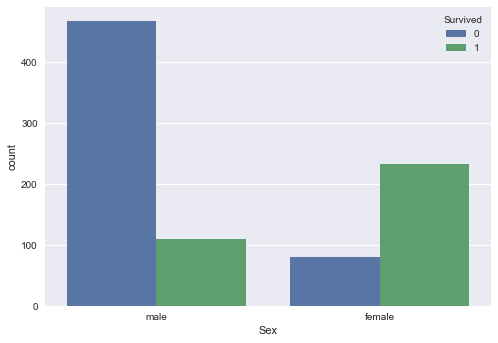

In [64]:
sns.countplot(x=titanic.Sex, hue=titanic.Survived)

We see that there is a very significant disparity between Male and Female Survival. Lets explore this as percentage.

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Sex,Survived'>

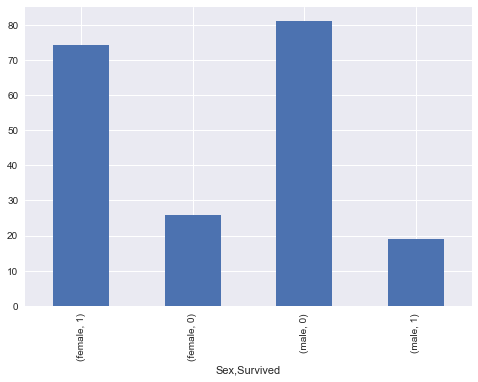

In [65]:
print(titanic.groupby("Sex").Survived.value_counts(normalize=True) * 100)
(titanic.groupby("Sex").Survived.value_counts(normalize=True) *
 100).plot(kind="bar")

Wow!! Females have a 74% chance of survival whereas Males have only 19% chance of survival.

### Effect of Age on Survival

<AxesSubplot:xlabel='Age'>

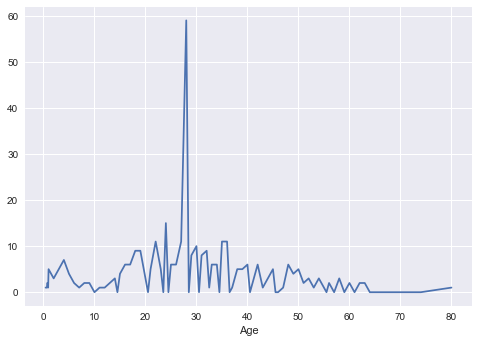

In [66]:
titanic.groupby("Age").Survived.sum().plot()

We see a huge spike on 28 years. This may be due to imputation of missing values with median (which was 28).

We also see a general trend for 15-50 years old.

The trend is downward for people aged greater than 50 years old.

<AxesSubplot:xlabel='Parch', ylabel='count'>

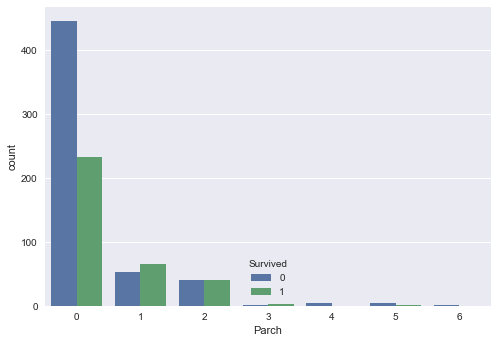

In [67]:
sns.countplot(x=titanic.Parch, hue=titanic.Survived)

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Parch'>

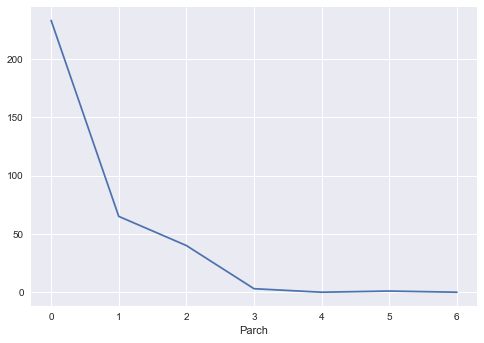

In [68]:
print(titanic.groupby("Parch").Survived.sum())
titanic.groupby("Parch").Survived.sum().plot()

In [69]:
# Now let's find the percent of passengers survived against their number of parent/children
titanic.groupby([
    "Parch", "Survived"
]).Parch.count() / titanic.groupby("Parch").Parch.count() * 100

Parch  Survived
0      0            65.634218
       1            34.365782
1      0            44.915254
       1            55.084746
2      0            50.000000
       1            50.000000
3      0            40.000000
       1            60.000000
4      0           100.000000
5      0            80.000000
       1            20.000000
6      0           100.000000
Name: Parch, dtype: float64

Surprisingly passengers with 1,2&3 parents/children has a better survival percentage than others. As Sample size is very low we can't draw any conclusion from this.

### Effect of Family Size on Survival

Family_Size
0     163
1      89
2      59
3      21
4       3
5       3
6       4
7       0
10      0
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Family_Size'>

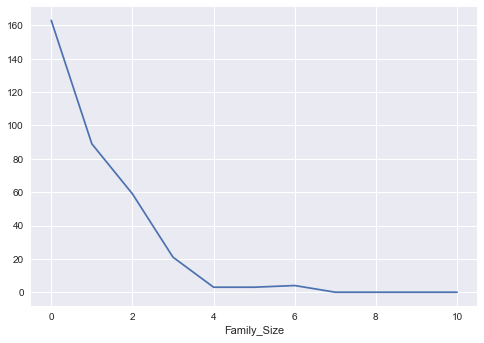

In [70]:
print(titanic.groupby("Family_Size").Survived.sum())
titanic.groupby("Family_Size").Survived.sum().plot()

We see that as Family Size increases number of survivors decrease significantly. But this may be due to high number of single passengers (passengers with no family). Let's dig deeper.

<AxesSubplot:xlabel='Survived', ylabel='Family_Size'>

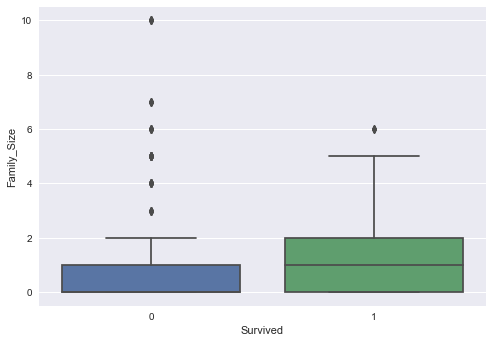

In [71]:
sns.boxplot(x=titanic.Survived, y=titanic.Family_Size)

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

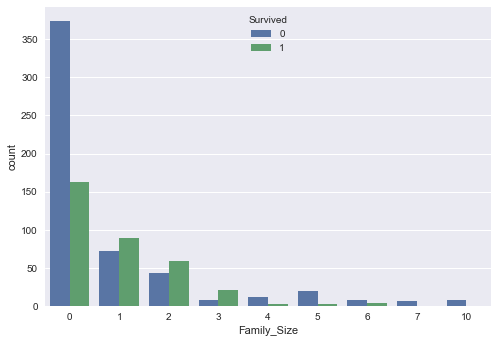

In [72]:
sns.countplot(x=titanic.Family_Size, hue=titanic.Survived)

In [73]:
# Now let's find the percent of passengers survived against their number of Family Size
titanic.groupby(["Family_Size", "Survived"]).Family_Size.count(
) / titanic.groupby("Family_Size").Family_Size.count() * 100

Family_Size  Survived
0            0            69.646182
             1            30.353818
1            0            44.720497
             1            55.279503
2            0            42.156863
             1            57.843137
3            0            27.586207
             1            72.413793
4            0            80.000000
             1            20.000000
5            0            86.363636
             1            13.636364
6            0            66.666667
             1            33.333333
7            0           100.000000
10           0           100.000000
Name: Family_Size, dtype: float64

After further investigation we see that passengers with 1-3 Family members are more likely to survive. But for passengers with Large Family size (>3) survival rate is very low

## Correlation of Columns

We could analyze further for any relation between columns like:

    * There seems to be some relation between Fare and Cabin/Non-Cabin
    * There seems to be some relation between Fare and Passengers Traveling with same ticket number.(all persons fare are same regardless of same or different cabins)
    * There seems to be some relation between Fare and Cabin Level(B,C,E etc)
    * Further Bivariate analysis for inner column relationships (i.e, SibSp&Parch etc.)
    * Did people with same ticket travelled in same class?
    
But these will lengthen our process. So we will skip these for now and will try to visualize any linear correlation.

<AxesSubplot:>

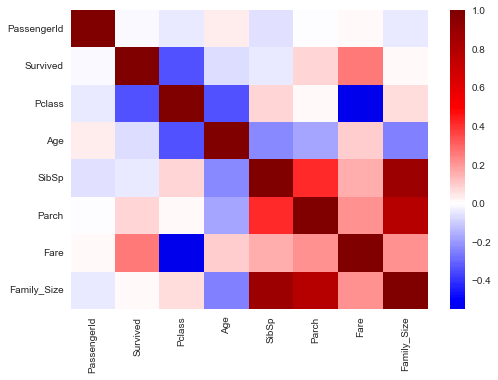

In [74]:
sns.heatmap(titanic.corr(), cmap='seismic', center=0)

<b>Interpretation:</b>
    
    1. Family Size has very strong positive linear correlation with SibSp, Parch; moderate positive linear correlation with Fare; slight positive linear correlation with Pclass and moderate negative linear correlation with Age.
    2. Fare has moderate positive linear correlation with Survival, Parch and Family Size; slight positive linear correlation with Age and SibSp; and strong negative linear correlation with Pclass.
    3. Parch and SibSp are strongly correlated meaning Passenger with Parents/Children are highly likely to also have Siblings/Spouses on Board.
    4. Parch and SibSp has slight positive linear correlation with Survival and Pclass; and moderate negative correlation with Age. 
    5. Age has strong negative linear correlation with Pclass.
    6. Pclass has moderate negative linear correlation with Survival.

# Feature Engineering

## Family Size

In [75]:
# we only do this for test data as we already done this step for train(titanic) data.
test_data['Family_Size'] = test_data.SibSp + test_data.Parch

## Cabin Level

Idea taken from https://www.kaggle.com/vincentwainman/binary-classif-from-a-beginner-for-beginners?scriptVersionId=83048950&cellId=43

In [76]:
def cabin_level(row):
    return row.str.extract(r'^(.+?)\d') # extract before first number

In [77]:
titanic['Cabin_Level'] = cabin_level(titanic.Cabin)
test_data['Cabin_Level'] = cabin_level(test_data.Cabin)

There would be some missing values at Cabin Level as some values did not have any number associated with them. 

In [78]:
titanic.Cabin_Level.fillna('non_cabin', inplace=True)
test_data.Cabin_Level.fillna('non_cabin', inplace=True)

## Number of Cabins

We saw some passengers booked more than one cabin, but to simplify our process we just took the first one for 'Cabin Level' & 'Cabin Number'. We can introduce another feature to inform our model about the Number of Cabins Booked by a passenger.

In [79]:
def cabin_count(df):
    for i,cabins in enumerate(df.Cabin):
        if cabins != 'non_cabin':
            df.loc[i,'Cabin_Count'] = len(cabins.split())
        else: continue
            
# first we will initialize Cabin Count as 0
titanic['Cabin_Count'] = 0
test_data['Cabin_Count']= 0

# this function changes the values inplace
cabin_count(titanic)
cabin_count(test_data)

In [80]:
titanic.Cabin_Count.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_Count, dtype: int64

In [81]:
test_data.Cabin_Count.value_counts()

0    327
1     74
2     10
3      4
4      3
Name: Cabin_Count, dtype: int64

## Ticket Text

There are some tickets with some text before number. we will split these and generate new features

In [82]:
def ticket_text(df):
    for i,text in enumerate(df.Ticket.str.split(' ',1).apply(lambda x: x[0])):
        try:
            int(text)
            df.loc[i, 'Ticket_Text'] = 'no_text'
        except:
            df.loc[i, 'Ticket_Text'] = text
            
titanic['Ticket_Text'] = ''
test_data['Ticket_Text'] = ''

ticket_text(titanic)
ticket_text(test_data)

## Family Name

We saw many passengers with same ticket number or other have same family name. this can be used as feature.

In [83]:
def family_name(df):
    return df.Name.str.split(',', 1).apply(lambda x: x[0])

titanic['Family_Name'] = family_name(titanic)
test_data['Family_Name'] = family_name(test_data)

## Title

In [84]:
titanic.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

After further inspection of Name Column we see that the titles are after first ',' and before a '.'. We will grab these and use as feature. These may help us to express social dynamic.

In [85]:
def title(df):
    return df.Name.str.split(',', 1).apply(lambda x: x[1]).str.split('.').apply(lambda x: x[0]).str.strip()

titanic['Title'] = title(titanic)
test_data['Title'] = title(test_data)

In [86]:
# Now Let's check how many titles are there
print(f'Unique Titles in Train(Titanic) Data: \n{titanic.Title.unique()}')
print(f'\nUnique Titles in Test Data: \n{test_data.Title.unique()}')

Unique Titles in Train(Titanic) Data: 
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']

Unique Titles in Test Data: 
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


We see that there is one Title on test set which is not from test set. Let's investigate the row.

In [87]:
test_data.query("Title == 'Dona'")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Cabin_Level,Cabin_Count,Ticket_Text,Family_Name,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,0,C,1,PC,Oliva y Ocana,Dona


After further investigation (some DuckDuckGo search) we see that 'Dona' was used as a title as a courtesy title before the name of a woman in a Spanish-speaking area(https://www.thefreedictionary.com/Do%C3%B1a). We also found a short bio of her which mentions she was not married(https://www.encyclopedia-titanica.org/titanic-survivor/fermina-oliva-y-ocana.html). So we will replace 'Dona' with 'Miss'

In [88]:
test_data.loc[414, 'Title'] = 'Miss'

## Fare per Person

In [89]:
titanic['Fare_per_Person'] = titanic.Fare / (titanic.Family_Size + 1)
test_data['Fare_per_Person'] = test_data.Fare / (test_data.Family_Size + 1)

# Data Preprocessing

We already extracted useful informations from 'Name', 'Ticket', 'Cabin' columns. So we will drop these

## Feature Selection

In [90]:
titanic_X = titanic.drop('Survived', axis=1)
titanic_y = titanic.Survived
test_data_X = test_data.copy()

In [91]:
titanic_X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Cabin_Level',
       'Cabin_Count', 'Ticket_Text', 'Family_Name', 'Title',
       'Fare_per_Person'],
      dtype='object')

In [92]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_X.drop(columns=columns_to_drop, inplace=True)
test_data_X.drop(columns=columns_to_drop, inplace=True)

In [93]:
titanic_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    int64  
 1   Sex              891 non-null    object 
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    object 
 7   Family_Size      891 non-null    int64  
 8   Cabin_Level      891 non-null    object 
 9   Cabin_Count      891 non-null    int64  
 10  Ticket_Text      891 non-null    object 
 11  Family_Name      891 non-null    object 
 12  Title            891 non-null    object 
 13  Fare_per_Person  891 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


## Data Encoding

In [94]:
cat_feat = ['Sex', 'Embarked', 'Cabin_Level', 'Ticket_Text', 'Family_Name', 'Title']
num_feat = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Cabin_Count', 'Fare_per_Person']

In [95]:
ord = OrdinalEncoder()
titanic_X[cat_feat] = ord.fit_transform(titanic_X[cat_feat])
test_data_X[cat_feat] = ord.fit_transform(test_data_X[cat_feat])

## Data Scaling

In [96]:
titanic_X_scaled = titanic_X.copy()
test_data_X_scaled = test_data_X.copy()

In [97]:
scaler = StandardScaler()
titanic_X_scaled[num_feat] = scaler.fit_transform(titanic_X_scaled[num_feat])
test_data_X_scaled[num_feat] = scaler.fit_transform(test_data_X_scaled[num_feat])

# Model Building

We will use both scaled and Unscaled data and compare the results to see how it effects the performance

## Data Splitting for Modeling 

In [98]:
titanic_X_train, titanic_X_test, titanic_y_train, titanic_y_test = train_test_split(
    titanic_X, titanic_y)
titanic_X_scaled_train, titanic_X_scaled_test, titanic_y_scaled_train, titanic_y_scaled_test = train_test_split(
    titanic_X_scaled, titanic_y)

## Simple Basic Model for Benchmark Score

We have seen from our EDA that sex has a very strong relation with survival. Here we will build a basic model which will predict every female survived and every male died. Accuracy of this model will be our benchmark.

In [99]:
titanic_y_sample_pred = titanic.Sex.map({'male':0, 'female':1})
benchmark_accuracy = round(accuracy_score(titanic_y, titanic_y_sample_pred)*100, 2)
print(f'Benchmark Accuracy is: {benchmark_accuracy}% for training data')

Benchmark Accuracy is: 78.68% for training data


In [100]:
# Now Let's see how this model performs on test data
submission_y_pred = test_data.Sex.map({
    'male': 0,
    'female': 1
}).rename('Survived')
pd.concat([test_data.PassengerId, submission_y_pred],
          axis=1).set_index('PassengerId').to_csv(
              'sample_submission.csv')  # same as gender submission

This model scores 76.56% on kaggle.

Now we will try to improve this score.

## Different Models with Default Parameters

We will use:
    
    1. Logistic Regression Classifier
    2. Decision Tree Classifier
    3. Random Forest Classifier
    4. Support Vector Classifier
    5. KNN classifier
    6. Gradient Boosted Classifier

In [101]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
svm = SVC()

In [102]:
classifiers = [('Logistic Regression Classifier', log_reg), ('Decision Tree Classifier', decision_tree), 
              ('Random Forest Classifier', random_forest), ('Gradient Boosted Classifier', gradient_boosting), 
              ('KNN classifier', knn), ('Support Vector Machine', svm)]

In [103]:
print('Scores for Non-Scaled Data\n')
for model_name, clf in classifiers:
    clf.fit(titanic_X_train, titanic_y_train)
    pred = clf.predict(titanic_X_test)
    acc_score = round(accuracy_score(titanic_y_test, pred), 2)
    cv_score = cross_val_score(clf, titanic_X, titanic_y, cv=5)
    print(f'{model_name}\n5 fold cross validation scores are: {cv_score*100}% \nAccuracy Score is: {acc_score*100}%\n')

Scores for Non-Scaled Data

Logistic Regression Classifier
5 fold cross validation scores are: [81.00558659 79.21348315 76.40449438 75.28089888 82.02247191]% 
Accuracy Score is: 79.0%

Decision Tree Classifier
5 fold cross validation scores are: [73.74301676 79.7752809  79.7752809  74.15730337 78.08988764]% 
Accuracy Score is: 79.0%

Random Forest Classifier
5 fold cross validation scores are: [84.91620112 79.7752809  88.76404494 79.21348315 84.26966292]% 
Accuracy Score is: 83.0%

Gradient Boosted Classifier
5 fold cross validation scores are: [82.12290503 82.02247191 85.95505618 78.08988764 84.26966292]% 
Accuracy Score is: 82.0%

KNN classifier
5 fold cross validation scores are: [65.92178771 66.85393258 64.60674157 66.29213483 66.85393258]% 
Accuracy Score is: 71.0%

Support Vector Machine
5 fold cross validation scores are: [60.89385475 72.47191011 65.16853933 64.60674157 67.97752809]% 
Accuracy Score is: 66.0%



In [104]:
print('Scores for Scaled Data\n')
for model_name, clf in classifiers:
    clf.fit(titanic_X_scaled_train, titanic_y_scaled_train)
    pred = clf.predict(titanic_X_scaled_test)
    acc_score = round(accuracy_score(titanic_y_scaled_test, pred), 2)
    cv_score = cross_val_score(clf, titanic_X_scaled, titanic_y, cv=5)
    print(f'{model_name}\n5 fold cross validation scores are: {cv_score*100}% \nAccuracy Score is: {acc_score*100}%\n')

Scores for Scaled Data

Logistic Regression Classifier
5 fold cross validation scores are: [79.32960894 79.21348315 75.84269663 77.52808989 82.58426966]% 
Accuracy Score is: 78.0%

Decision Tree Classifier
5 fold cross validation scores are: [72.06703911 80.8988764  79.21348315 74.15730337 79.7752809 ]% 
Accuracy Score is: 73.0%

Random Forest Classifier
5 fold cross validation scores are: [83.79888268 80.33707865 88.76404494 78.65168539 84.26966292]% 
Accuracy Score is: 79.0%

Gradient Boosted Classifier
5 fold cross validation scores are: [82.12290503 82.02247191 87.07865169 78.08988764 84.26966292]% 
Accuracy Score is: 81.0%

KNN classifier
5 fold cross validation scores are: [62.01117318 61.23595506 62.35955056 61.23595506 67.97752809]% 
Accuracy Score is: 57.99999999999999%

Support Vector Machine
5 fold cross validation scores are: [61.45251397 61.79775281 61.79775281 61.79775281 61.23595506]% 
Accuracy Score is: 57.99999999999999%



We see un-scaled Data Has much better score.

## Hyper Parameter Tuning

Let's Find the parameters we may need to tune

In [105]:
for model_name, clf in classifiers:
    print(f'Parameters for {model_name}: \n{clf.get_params().keys()}\n')

Parameters for Logistic Regression Classifier: 
dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

Parameters for Decision Tree Classifier: 
dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

Parameters for Random Forest Classifier: 
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Parameters for Gradient Boosted Classifier: 
dict_keys(['ccp_alpha', 'criterion', 'init', 'learnin

In [106]:
# Now we will define the parameters for which we want to tune the model
param_log_reg = {'C':[0.1, 1, 10, 100], 'penalty':['l2'], 'solver':['liblinear', 'lbfgs'], 'max_iter':[500, 1000, 2000]}
param_decision_tree = {'max_depth':[10, 20, 30, 50], 'min_samples_leaf':[1, 2, 4], 'max_features':['auto', 'sqrt', 'log2'], 
                      'min_samples_split':[2, 5, 7]}
param_random_forest = {'max_depth':[10, 20, 30, 50], 'min_samples_leaf':[1, 2, 4], 'max_features':['auto', 'sqrt', 'log2'], 
                      'min_samples_split':[2, 5, 7], 'bootstrap':[True, False],
                       'n_estimators': [10, 100, 200, 500, 1000, 1500, 2000]}
param_gradient_boosting = {'max_depth':[10, 20, 30, 50], 'min_samples_leaf':[1, 2, 4], 'max_features':['auto', 'sqrt', 'log2'], 
                      'min_samples_split':[2, 5, 7], 'n_estimators': [10, 1000, 200, 500, 1000, 1500, 2000], 
                          'learning_rate':[0.01, 0.1, 0.5, 1]}
param_knn = {'n_neighbors':[3, 5, 7, 9]}
param_svm = {'C':[0.1, 1, 10], 'gamma':['auto'], 'kernel':['sigmoid']}

In [107]:
classifiers = [('Logistic Regression Classifier', log_reg, param_log_reg),
               ('Decision Tree Classifier', decision_tree, param_decision_tree),
               ('Random Forest Classifier', random_forest, param_random_forest),
               ('Gradient Boosted Classifier', gradient_boosting, param_gradient_boosting),
               ('KNN classifier', knn, param_knn), ('Support Vector Machine', svm, param_svm)]

In [108]:
print(f'Score For Scaled Data')
for model_name, clf, param in classifiers:
    rcv = RandomizedSearchCV(clf, param, scoring='accuracy', n_jobs=-1, cv=3)
    rcv.fit(titanic_X_scaled_train, titanic_y_scaled_train)
    print(f'{model_name}:- \nBest Params are: {rcv.best_params_}')
    pred = rcv.predict(titanic_X_scaled_test)
    acc_score = round(accuracy_score(titanic_y_scaled_test, pred), 2)
    print(f'Accuracy Score is: {acc_score*100}%\n')

Score For Scaled Data
Logistic Regression Classifier:- 
Best Params are: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': 100}
Accuracy Score is: 78.0%

Decision Tree Classifier:- 
Best Params are: {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Accuracy Score is: 77.0%

Random Forest Classifier:- 
Best Params are: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Accuracy Score is: 79.0%

Gradient Boosted Classifier:- 
Best Params are: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'learning_rate': 0.01}
Accuracy Score is: 79.0%

KNN classifier:- 
Best Params are: {'n_neighbors': 3}
Accuracy Score is: 60.0%

Support Vector Machine:- 
Best Params are: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0.1}
Accuracy Score is: 57.99999999999999%



In [109]:
print(f'Score For Un-Scaled Data')
for model_name, clf, param in classifiers:
    rcv = RandomizedSearchCV(clf, param, scoring='accuracy', n_jobs=-1, cv=3)
    rcv.fit(titanic_X_train, titanic_y_train)
    print(f'{model_name}:- \nBest Params are: {rcv.best_params_}')
    pred = rcv.predict(titanic_X_test)
    acc_score = round(accuracy_score(titanic_y_test, pred), 2)
    print(f'Accuracy Score is: {acc_score*100}%\n')

Score For Un-Scaled Data
Logistic Regression Classifier:- 
Best Params are: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 1}
Accuracy Score is: 79.0%

Decision Tree Classifier:- 
Best Params are: {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50}
Accuracy Score is: 82.0%

Random Forest Classifier:- 
Best Params are: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Accuracy Score is: 86.0%

Gradient Boosted Classifier:- 
Best Params are: {'n_estimators': 1000, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'learning_rate': 0.01}
Accuracy Score is: 82.0%

KNN classifier:- 
Best Params are: {'n_neighbors': 7}
Accuracy Score is: 71.0%

Support Vector Machine:- 
Best Params are: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0.1}
Accuracy Score is: 61.0%



## Ensembling Models

From above scores we saw tree based models did better for non scaled data. KNN did a lot better after parameter tuning. Some models did better with default parameters, as we used RandomizedSearchCV we couldn't tune the parameters exhaustively. For this we could use GridSearchCV, but that will be very time consuming and would need higher resources.

So, for Ensembling we will use Voting Classifier with Decision Tree Classifier, Random Forest Classifier and Gradient Boosting Classifier. We will use GridSearchCV to better tune our models.

In [123]:
# Now we will define the parameters for which we want to tune the model
param_decision_tree = {'max_depth':[10, 20, 50], 'min_samples_leaf':[2, 5], 'max_features':['log2'], 
                      'min_samples_split':[5, 7, 10]}
param_random_forest = {'max_depth':[10, 20, 50], 'min_samples_leaf':[2, 5], 'max_features':['log2'], 
                      'min_samples_split':[5, 7, 10], 'bootstrap':[False],
                       'n_estimators': [500, 1000, 2000]}
param_gradient_boosting = {'max_depth':[10, 20, 50], 'min_samples_leaf':[2, 5], 'max_features':['log2'], 
                      'min_samples_split':[5, 7, 10], 'n_estimators': [500, 1000, 2000], 
                          'learning_rate':[0.1, 1, 10]}

In [124]:
classifiers = [('decision_tree', decision_tree, param_decision_tree),
               ('random_forest', random_forest, param_random_forest),
               ('gradient_boosting', gradient_boosting, param_gradient_boosting)]
best_params = dict()

for model_name, clf, param in classifiers:
    gcv = GridSearchCV(clf, param, scoring='accuracy', n_jobs=-1, cv=5)
    gcv.fit(titanic_X_train, titanic_y_train)
    best_params.update({model_name: gcv.best_params_})
    pred = gcv.predict(titanic_X_test)
    acc_score = round(accuracy_score(titanic_y_test, pred), 2)
    print(f'Accuracy Score for {model_name} is: {acc_score*100}%\n')

Accuracy Score for decision_tree is: 80.0%

Accuracy Score for random_forest is: 84.0%

Accuracy Score for gradient_boosting is: 83.0%



In [125]:
best_params

{'decision_tree': {'max_depth': 50,
  'max_features': 'log2',
  'min_samples_leaf': 5,
  'min_samples_split': 5},
 'random_forest': {'bootstrap': False,
  'max_depth': 50,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 2000},
 'gradient_boosting': {'learning_rate': 0.1,
  'max_depth': 50,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 1000}}

In [138]:
decision_tree_clf = DecisionTreeClassifier(max_depth=50, max_features='log2', min_samples_leaf=5, min_samples_split=5)
random_forest_clf = RandomForestClassifier(
    bootstrap=False, max_depth=50, max_features='log2', min_samples_leaf=2, min_samples_split=10, n_estimators=2000)
gradient_boosting_clf = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=50, max_features='log2', min_samples_leaf=2, min_samples_split=5, n_estimators=1000)

voting_clf_hard = VotingClassifier(estimators=[
    ('decision_tree_clf', decision_tree_clf),
    ('random_forest_clf', random_forest_clf),
    ('gradient_boosting_clf', gradient_boosting_clf)
],
    voting='hard',
    n_jobs=-1)
voting_clf_soft = VotingClassifier(estimators=[
    ('decision_tree_clf', decision_tree_clf), ('random_forest_clf', random_forest_clf),
    ('gradient_boosting_clf', gradient_boosting_clf)
],
    voting='soft',
    n_jobs=-1)

In [140]:
# Hard Voting
voting_clf_hard.fit(titanic_X_train, titanic_y_train)
pred = voting_clf_hard.predict(titanic_X_test)
score = round(accuracy_score(titanic_y_test, pred), 2)
print(f'Accuracy for Hard Voting Classifier is: {score*100}%')

Accuracy for Hard Voting Classifier is: 83.0%


In [141]:
# Soft Voting
voting_clf_soft.fit(titanic_X_train, titanic_y_train)
pred = voting_clf_soft.predict(titanic_X_test)
score = round(accuracy_score(titanic_y_test, pred), 2)
print(f'Accuracy for Soft Voting Classifier is: {score*100}%')

Accuracy for Soft Voting Classifier is: 83.0%


We will use Hard Voting for Predictions

# Predictions

## Using Voting Classifier

In [142]:
test_data_pred_hard = voting_clf_hard.predict(test_data_X)
prediction_df_hard = pd.DataFrame(test_data.PassengerId)
prediction_df_hard['Survived'] = test_data_pred_hard

In [143]:
prediction_df_hard

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [144]:
# Generate Submission File
prediction_df_hard.set_index('PassengerId').to_csv('submission_voting_clf_hard.csv')

This model scored 0.71531 on kaggle

In [145]:
test_data_pred_soft = voting_clf_soft.predict(test_data_X)
prediction_df_soft = pd.DataFrame(test_data.PassengerId)
prediction_df_soft['Survived'] = test_data_pred_soft

In [146]:
prediction_df_soft

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [147]:
# Generate Submission File
prediction_df_soft.set_index('PassengerId').to_csv('submission_voting_clf_soft.csv')

This model scored 0.75358 on kaggle

## Using Random Forest Classifier

In [148]:
random_forest_clf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features='log2', max_depth=10, bootstrap=False)

random_forest_clf.fit(titanic_X, titanic_y)
test_data_pred = random_forest_clf.predict(test_data_X)
prediction_df = pd.DataFrame(test_data.PassengerId)
prediction_df['Survived'] = test_data_pred

# Generate Submission File
prediction_df.set_index('PassengerId').to_csv('submission_random_forest_clf.csv')

# view prediction
prediction_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


kaggle score 0.74162

# To Do to Improve Model Performance

1. Using other Gradient Boosted Classifiers such as XgBoost.
2. Further Feature Engineering
3. Changing encoder (manual encoding)
4. Merging train & test set before data encoding
5. Using other classifiers (logreg, svm) with tree based classifiers in Voting Classifier